# Gas storage Germany 

## Data collection and preparation

In [3]:
# Import libraries needed
import pandas as pd
import requests
import numpy as np
import ipywidgets as widgets
import datetime as dt
from datetime import datetime
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Pull data using requests, normalize json 
r = requests.get('https://agsi.gie.eu/api/about?show=table')    
df = json_normalize(r.json())

In [9]:
# Keep only rows where country column equals Germany
df_Germany= df[df['country'] == 'DE']

# Turn the url column into a list to loop through it
url = df_Germany['url'].to_list()

In [13]:
# Create a list to append data for each itteration of the loop
data=[]

# Variables for API (key,date_from,size_of_pages):
headers = {"x-key": "ENTER-INDIVIDUAL-KEY"}
fromdate = '2018-01-01'
size= 300

In [15]:
# Create for loop that requests the url and extracts the data from the JSON
# In the loop add a for loop to go through each page available in the response
for x in url:
    r = requests.get(x,params={"from": fromdate,"size":size}, headers=headers).json()
    for page in range(0,r["last_page"]):
        api = requests.get(x,params={"from": fromdate,"size": size,"page":{page}}, headers=headers)
        df = json_normalize(api.json())
        j=df["data"]
        jd=j.explode('data')
        jd_final=pd.DataFrame(jd.apply(pd.Series))
        data.append(jd_final)

# Concatenate the data into one dataframe and print head to check
storage_Germany= pd.concat(data)
print(storage_Germany.head())

               name              code      publication_link  \
0  astora (Germany)  21X000000001160J  http://www.astora.de   
1  astora (Germany)  21X000000001160J  http://www.astora.de   
2  astora (Germany)  21X000000001160J  http://www.astora.de   
3  astora (Germany)  21X000000001160J  http://www.astora.de   
4  astora (Germany)  21X000000001160J  http://www.astora.de   

                            transparency_template                  url  \
0  https://www.astora.de/en/transparency-template  21X000000001160J/DE   
1  https://www.astora.de/en/transparency-template  21X000000001160J/DE   
2  https://www.astora.de/en/transparency-template  21X000000001160J/DE   
3  https://www.astora.de/en/transparency-template  21X000000001160J/DE   
4  https://www.astora.de/en/transparency-template  21X000000001160J/DE   

             updatedAt gasDayStart gasInStorage injection withdrawal  ...  \
0  2024-05-03 06:21:05  2024-05-02      29.6526    256.37        6.7  ...   
1  2024-05-02 06:04:35

In [16]:
# Print the column names as an index object 
print("Column names:", storage_Germany.columns)  

# Print the column names as a list
print("Column names (as list):", storage_Germany.columns.tolist())

Column names: Index([                 'name',                  'code',
            'publication_link', 'transparency_template',
                         'url',             'updatedAt',
                 'gasDayStart',          'gasInStorage',
                   'injection',            'withdrawal',
               'netWithdrawal',      'workingGasVolume',
           'injectionCapacity',    'withdrawalCapacity',
          'contractedCapacity',     'availableCapacity',
                      'status',                 'trend',
                        'full',                  'info',
                   'longitude',              'latitude',
                        'type',                       0],
      dtype='object')
Column names (as list): ['name', 'code', 'publication_link', 'transparency_template', 'url', 'updatedAt', 'gasDayStart', 'gasInStorage', 'injection', 'withdrawal', 'netWithdrawal', 'workingGasVolume', 'injectionCapacity', 'withdrawalCapacity', 'contractedCapacity', 'availableCap

In [17]:
# List of columns to keep
columns_to_keep = ['name', 'gasDayStart', 'gasInStorage', 'injection', 'withdrawal', 'netWithdrawal', 'workingGasVolume', 'injectionCapacity', 'withdrawalCapacity', 'contractedCapacity', 'availableCapacity', 'trend', 'full']

# Select only the relevant columns
storage_Germany = storage_Germany[columns_to_keep]

print("Data with relevant columns:")
print(storage_Germany)

Data with relevant columns:
                   name gasDayStart gasInStorage injection withdrawal  \
0      astora (Germany)  2024-05-02      29.6526    256.37        6.7   
1      astora (Germany)  2024-05-01      29.4029    279.06        1.9   
2      astora (Germany)  2024-04-30      29.1257    194.65        2.5   
3      astora (Germany)  2024-04-29      28.9335    149.49        1.5   
4      astora (Germany)  2024-04-28      28.7855    208.79        3.5   
..                  ...         ...          ...       ...        ...   
295  UGS Jemgum H (VGS)  2018-08-07            -         -          -   
296  UGS Jemgum H (VGS)  2018-08-06            -         -          -   
297  UGS Jemgum H (VGS)  2018-08-05            -         -          -   
298  UGS Jemgum H (VGS)  2018-08-04            -         -          -   
299  UGS Jemgum H (VGS)  2018-08-03            -         -          -   

    netWithdrawal workingGasVolume injectionCapacity withdrawalCapacity  \
0          -249.7   

## Deep Dive: Astora Storage

Astora operates significant gas storage facilities in Germany. The largest and most notable is the Rehden gas storage facility in Lower Saxony, which is among the largest in Western Europe, with a working gas capacity of around 4 billion cubic meters (bcm).

In [23]:
# Filter to receive only the information on the astora storage 
astora_data = storage_Germany[storage_Germany['name'] == 'astora (Germany)']

print(astora_data)

                 name gasDayStart gasInStorage injection withdrawal  \
0    astora (Germany)  2024-05-02      29.6526    256.37        6.7   
1    astora (Germany)  2024-05-01      29.4029    279.06        1.9   
2    astora (Germany)  2024-04-30      29.1257    194.65        2.5   
3    astora (Germany)  2024-04-29      28.9335    149.49        1.5   
4    astora (Germany)  2024-04-28      28.7855    208.79        3.5   
..                ...         ...          ...       ...        ...   
295  astora (Germany)  2018-08-07      42.7198    133.61          0   
296  astora (Germany)  2018-08-06      42.5786     181.2          0   
297  astora (Germany)  2018-08-05      42.3895    251.33          0   
298  astora (Germany)  2018-08-04      42.1304    241.89          0   
299  astora (Germany)  2018-08-03        41.88    191.78          0   

    netWithdrawal workingGasVolume injectionCapacity withdrawalCapacity  \
0          -249.7          52.7104            489.96              753.6 

In [25]:
# Ensure 'gasDayStart' is in datetime format
astora_data = astora_data.copy()  # Make a copy to avoid warnings
astora_data['gasDayStart'] = pd.to_datetime(astora_data['gasDayStart'])

# Convert 'full' to numeric, setting errors='coerce' to handle non-numeric data
astora_data['full'] = pd.to_numeric(astora_data['full'], errors='coerce')

# Split 'gasDayStart' into 'Day', 'Month', and 'Year'
astora_data['Day'] = astora_data['gasDayStart'].dt.day
astora_data['Month'] = astora_data['gasDayStart'].dt.month
astora_data['Year'] = astora_data['gasDayStart'].dt.year

# Drop rows with NaN values in 'full'
astora_data_cleaned = astora_data.dropna(subset=['full'])

# Sort by 'Month' first, then 'Day'
astora_data_sorted = astora_data_cleaned.sort_values(by=['Month', 'Day'])

# Create the pivot table with 'Month' and 'Day' as the index, 'Year' as the columns, and 'full' as the values
pivot_table = astora_data_sorted.pivot_table(
    index=['Month', 'Day'],  # Use 'Month' and 'Day' as the multi-index for rows
    columns='Year',  # Use 'Year' for the columns
    values='full',  # Show the 'full' values
    aggfunc='mean'  # Aggregation function
)

# Reset the index to ensure 'Month' is visible
pivot_table_reset = pivot_table.reset_index()
pivot_table_with_month = pivot_table_reset.set_index(['Month', 'Day'])

# Display the pivot table with 'Month' in each row
print(pivot_table_with_month.head(100))  # Output the pivot table to inspect

Year       2018   2019   2020   2021   2022   2023   2024
Month Day                                                
1     1     NaN  77.10  97.59  64.57  15.96  90.87  82.17
      2     NaN  76.93  97.56  63.69  16.20  90.98  81.71
      3     NaN  76.30  97.49  62.83  16.31  90.99  81.10
      4     NaN  75.97  97.49  61.64  16.45  91.04  80.41
      5     NaN  75.97  97.51  60.37  16.28  91.11  79.71
...         ...    ...    ...    ...    ...    ...    ...
4     5     NaN  45.02  91.64   9.66   2.81  78.39  52.95
      6     NaN  45.41  91.68   9.62   2.86  78.40  53.59
      7     NaN  45.94  91.72   9.50   2.89  78.45  54.29
      8     NaN  46.32  91.79   9.49   2.85  78.58  54.67
      9     NaN  46.39  91.86   9.27   2.89  78.81  55.02

[100 rows x 7 columns]


In [27]:
# Ensure 'gasDayStart' is in datetime format
astora_data = astora_data.copy()  # Create a copy to avoid warnings
astora_data['gasDayStart'] = pd.to_datetime(astora_data['gasDayStart'])  # Convert to datetime

print(astora_data.dtypes)

name                          object
gasDayStart           datetime64[ns]
gasInStorage                  object
injection                     object
withdrawal                    object
netWithdrawal                 object
workingGasVolume              object
injectionCapacity             object
withdrawalCapacity            object
contractedCapacity            object
availableCapacity             object
trend                         object
full                         float64
Day                            int32
Month                          int32
Year                           int32
dtype: object


In [28]:
# Split 'gasDayStart' into 'Day', 'Month', and 'Year'
astora_data['Day'] = astora_data['gasDayStart'].dt.day
astora_data['Month'] = astora_data['gasDayStart'].dt.month
astora_data['Year'] = astora_data['gasDayStart'].dt.year

print(astora_data.head(5))

               name gasDayStart gasInStorage injection withdrawal  \
0  astora (Germany)  2024-05-02      29.6526    256.37        6.7   
1  astora (Germany)  2024-05-01      29.4029    279.06        1.9   
2  astora (Germany)  2024-04-30      29.1257    194.65        2.5   
3  astora (Germany)  2024-04-29      28.9335    149.49        1.5   
4  astora (Germany)  2024-04-28      28.7855    208.79        3.5   

  netWithdrawal workingGasVolume injectionCapacity withdrawalCapacity  \
0        -249.7          52.7104            489.96              753.6   
1        -277.2          52.7104            489.96              753.6   
2        -192.2          52.7104            489.96              753.6   
3        -147.9          52.7104            489.96              753.6   
4        -205.3          52.7104            489.96              753.6   

  contractedCapacity availableCapacity trend   full  Day  Month  Year  
0            52.7104                 0  0.47  56.26    2      5  2024  
1 

In [29]:
# Sort by 'Month' first, then 'Day'
astora_data_sorted = astora_data.sort_values(by=['Month', 'Day'])

print(astora_data_sorted.head(5))

                 name gasDayStart gasInStorage injection withdrawal  \
122  astora (Germany)  2024-01-01      45.3058     26.35      196.8   
122  astora (Germany)  2024-01-01      45.3058     26.35      196.8   
187  astora (Germany)  2023-01-01      47.0773     41.98          0   
252  astora (Germany)  2022-01-01       8.2828    240.74        0.5   
17   astora (Germany)  2021-01-01      34.0951         0      424.3   

    netWithdrawal workingGasVolume injectionCapacity withdrawalCapacity  \
122         170.5          55.1399             489.9             753.51   
122         170.5          55.1399             489.9             753.51   
187           -42           51.805            480.89             739.65   
252        -240.2          51.8871            480.89             739.65   
17          424.3          52.8026            480.89             739.65   

    contractedCapacity availableCapacity trend   full  Day  Month  Year  
122            55.1399                 0     0  

In [33]:
# Create a pivot table with 'Month' and 'Day' as the index, 'Year' as the columns, and 'full' as the values
pivot_table = astora_data_sorted.pivot_table(
    index=['Month', 'Day'],  # Use 'Month' and 'Day' as the multi-index for rows
    columns='Year',  # Use 'Year' for the columns
    values='full',  # Show the 'full' values
    aggfunc='mean'  # Aggregation function
)

print(pivot_table.head(60))

Year       2018   2019   2020   2021   2022   2023   2024
Month Day                                                
1     1     NaN  77.10  97.59  64.57  15.96  90.87  82.17
      2     NaN  76.93  97.56  63.69  16.20  90.98  81.71
      3     NaN  76.30  97.49  62.83  16.31  90.99  81.10
      4     NaN  75.97  97.49  61.64  16.45  91.04  80.41
      5     NaN  75.97  97.51  60.37  16.28  91.11  79.71
      6     NaN  75.94  97.49  59.09  16.10  91.28  79.01
      7     NaN  75.74  97.51  57.84  16.07  91.33  78.19
      8     NaN  75.74  97.53  56.53  16.09  91.37  77.22
      9     NaN  75.58  97.50  55.22  16.10  91.34  76.22
      10    NaN  75.14  97.49  53.97  15.95  91.35  75.18
      11    NaN  74.92  97.37  52.84  15.56  91.29  74.19
      12    NaN  74.78  97.29  51.76  15.15  91.27  73.34
      13    NaN  74.65  97.21  50.67  14.75  91.30  72.54
      14    NaN  74.11  97.17  49.41  14.36  91.35  71.77
      15    NaN  73.61  97.20  48.21  14.09  91.39  70.91
      16    Na

In [34]:
# Columns that need NaN value handling
columns_to_fill = [2019,2020,2021,2022,2023]

# For each column, interpolate the NaN values linearly
for col in columns_to_fill:
    pivot_table[col] = pivot_table[col].interpolate(method='linear', limit_direction='both')

print(pivot_table.head(60))

Year       2018   2019   2020    2021   2022    2023   2024
Month Day                                                  
1     1     NaN  77.10  97.59  64.570  15.96  90.870  82.17
      2     NaN  76.93  97.56  63.690  16.20  90.980  81.71
      3     NaN  76.30  97.49  62.830  16.31  90.990  81.10
      4     NaN  75.97  97.49  61.640  16.45  91.040  80.41
      5     NaN  75.97  97.51  60.370  16.28  91.110  79.71
      6     NaN  75.94  97.49  59.090  16.10  91.280  79.01
      7     NaN  75.74  97.51  57.840  16.07  91.330  78.19
      8     NaN  75.74  97.53  56.530  16.09  91.370  77.22
      9     NaN  75.58  97.50  55.220  16.10  91.340  76.22
      10    NaN  75.14  97.49  53.970  15.95  91.350  75.18
      11    NaN  74.92  97.37  52.840  15.56  91.290  74.19
      12    NaN  74.78  97.29  51.760  15.15  91.270  73.34
      13    NaN  74.65  97.21  50.670  14.75  91.300  72.54
      14    NaN  74.11  97.17  49.410  14.36  91.350  71.77
      15    NaN  73.61  97.20  48.210  1

In [35]:
# Display the existing columns in the pivot table
print("Existing columns:", pivot_table.columns)

Existing columns: Index([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Year')


In [36]:
# Given pivot table with 'Month' and 'Day' as index and years as columns
# Create a copy of the pivot table to avoid potential copy errors
pivot_table_with_extra_columns = pivot_table.copy()

# Define the columns to consider for calculating MIN, MAX, and AVG
target_columns = [2019,2020,2021,2022,2023]

# Add a new column 'MIN' with the minimum value across specified years
pivot_table_with_extra_columns['MIN'] = pivot_table_with_extra_columns[target_columns].min(axis=1, skipna=True)

# Add a new column 'MAX' with the maximum value across specified years
pivot_table_with_extra_columns['MAX'] = pivot_table_with_extra_columns[target_columns].max(axis=1, skipna=True)

# Add a new column 'AVG' with the average value across specified years
pivot_table_with_extra_columns['AVG'] = pivot_table_with_extra_columns[target_columns].mean(axis=1, skipna=True)

# Display the updated pivot table to inspect the new columns
print(pivot_table_with_extra_columns.head(65))  # Check the first 10 rows with the new columns

Year       2018   2019   2020   2021   2022   2023   2024    MIN    MAX  \
Month Day                                                                 
1     1     NaN  77.10  97.59  64.57  15.96  90.87  82.17  15.96  97.59   
      2     NaN  76.93  97.56  63.69  16.20  90.98  81.71  16.20  97.56   
      3     NaN  76.30  97.49  62.83  16.31  90.99  81.10  16.31  97.49   
      4     NaN  75.97  97.49  61.64  16.45  91.04  80.41  16.45  97.49   
      5     NaN  75.97  97.51  60.37  16.28  91.11  79.71  16.28  97.51   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
3     1     NaN  38.49  93.39  20.14   8.46  83.75  49.51   8.46  93.39   
      2     NaN  38.40  92.35  19.85   8.14  83.52  49.89   8.14  92.35   
      3     NaN  38.35  92.21  19.51   7.69  83.27  50.33   7.69  92.21   
      4     NaN  38.24  92.09  19.26   7.23  83.10  50.35   7.23  92.09   
      5     NaN  38.26  91.99  19.02   6.81  82.92  50.22   6.81  91.99   

Year          AVG  
Mont

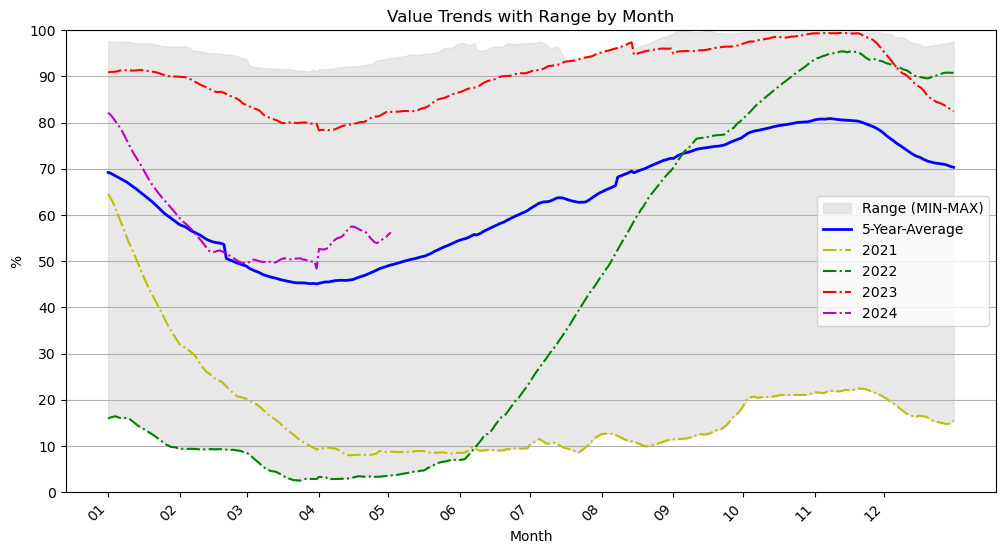

In [37]:
# Ensure the data frame has the 'DayMonth' column with month-day information
pivot_table_with_extra_columns['DayMonth'] = pivot_table_with_extra_columns.index.to_series().apply(lambda x: f"{x[0]:02d}-{x[1]:02d}")

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size for better visibility

# Plot the shaded area between 'MIN' and 'MAX'
plt.fill_between(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns['MIN'],
    pivot_table_with_extra_columns['MAX'],
    color='lightgrey',
    alpha=0.5,  # Transparency for shading
    label='Range (MIN-MAX)'
)

# Plot the 'AVG' line
plt.plot(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns['AVG'],
    label='5-Year-Average',
    color='b',
    linestyle='-',
    linewidth=2
)

# Plot lines for the years 2022, 2023, and 2024
plt.plot(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns[2021],
    label='2021',
    color='y',
    linestyle='-.',  # Dashed line
    linewidth=1.5
)
plt.plot(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns[2022],
    label='2022',
    color='g',
    linestyle='-.',  # Dashed line
    linewidth=1.5
)

plt.plot(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns[2023],
    label='2023',
    color='r',
    linestyle='-.',  # Dash-dot line
    linewidth=1.5
)

plt.plot(
    pivot_table_with_extra_columns['DayMonth'],
    pivot_table_with_extra_columns[2024],
    label='2024',
    color='m',
    linestyle='-.',
    linewidth=1.5
)

# Set y-axis range and custom ticks
plt.ylim(0, 100)  # Set the range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-ticks every 10 units

# Adjust the x-axis to show only the month
months = pivot_table_with_extra_columns.index.get_level_values(0).unique()  # Get unique months
month_labels = [f"{m:02d}" for m in months]  # Format the month labels
month_ticks = pivot_table_with_extra_columns[pivot_table_with_extra_columns.index.get_level_values(1) == 1]['DayMonth']  # Get the first day of each month for tick placement

plt.xticks(month_ticks, month_labels, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add labels, title, and grid
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('%')  # Label for the y-axis
plt.title('Value Trends with Range by Month')  # Chart title
plt.grid(axis='y')  # Only show horizontal grid lines

# Add a legend
plt.legend(loc='best')  # Position the legend at the best location

# Show the chart
plt.show()

The Rehden gas storage facility in Germany became a symbol of the country's reliance on Russian gas following the Russian invasion of Ukraine in February 2022. After the winter of 2021/2022, Gazprom, the operator, left the storage at below 5% capacity by early April 2022. Observers suggested that this was part of Vladimir Putin's plan to pressure Germany.

In response, the German Federal Ministry for Economic Affairs and Climate Action placed Gazprom Germania under the trusteeship of the Federal Network Agency. To stabilize the gas supply chain, the government introduced the Gas Storage Law and new regulations to ensure storage targets were met. Although Rehden fell short of its 95% target for November 2022, it reached 99.3% by November 2023.